## Assignment 6 - Unit Test Your Functions!

Follow the instructions in the following notebook cell. You will be graded on:

    - Whether your unit tests are passing
    - The completion of this notebook

## Part 1:

In [17]:
# import the stuff you need here: os, glob, natsort, numpy, matplotlib.pyplot, pandas:

# example import, don't edit this.
import sys
sys.path.append('../')   # appending your project to python path

# import the rest:
import os
from glob import glob
import natsort
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Data I/O:

First, in the `utils.py` file from the `functions` folder, recreate the function to get all the `.csv` data files:

```python
def get_files(path_pattern):
    Given a `path_pattern` describing the path to all your data files, sorts the matching data files in alphanumerical order and returns a list with all file paths.

    Input: 
        path_pattern (list): Path to all data files as described by a wildcard (*)
    Returns:
        files (list): Alphanumerical sorted list of all data files matching your path_pattern description.
```

Import it using relative imports and use it in the following cells to load your data. Remember `.`

In [18]:
# first import your utility function:
from functions.utils import get_files

# Provide the wildcard (*) string pattern for your data files:
data_pattern = "./data/*.csv"

# Use your utilities function to read and return a list of sorted data files: 
data_files = get_files(data_pattern)
print('There are {} data csv files in the data folder'.format(len(data_files)))
print(data_files)


There are 56 data csv files in the data folder
['./data/_5_1_cyan.csv', './data/_5_2_cyan.csv', './data/_5_3_cyan.csv', './data/_5_4_cyan.csv', './data/_5_5_cyan.csv', './data/_5_6_cyan.csv', './data/_6_1_cyan.csv', './data/_6_2_cyan.csv', './data/_7_1_cyan.csv', './data/_7_2_cyan.csv', './data/_8_1_cyan.csv', './data/_8_2_cyan.csv', './data/_8_3_cyan.csv', './data/_8_4_cyan.csv', './data/_8_5_cyan.csv', './data/_8_6_cyan.csv', './data/_9_1_cyan.csv', './data/_9_2_cyan.csv', './data/_9_3_cyan.csv', './data/_9_4_cyan.csv', './data/_9_5_cyan.csv', './data/_9_6_cyan.csv', './data/_9_7_cyan.csv', './data/_9_8_cyan.csv', './data/_9_9_cyan.csv', './data/_9_10_cyan.csv', './data/_13_1_cyan.csv', './data/_13_2_cyan.csv', './data/_16_1_cyan.csv', './data/_16_2_cyan.csv', './data/_18_1_cyan.csv', './data/_18_2_cyan.csv', './data/_20_1_cyan.csv', './data/_20_2_cyan.csv', './data/_20_3_cyan.csv', './data/_20_4_cyan.csv', './data/_35_1_cyan.csv', './data/_35_2_cyan.csv', './data/_55_1_cyan.csv', '.

### Create DataFrame:

Use `pandas` to load your `.csv` file data and turn them into a `dataframe`, then display the first 5 entries of your `dataframe`:

In [19]:
# read in your csv files, concatenate all the csv's one by one into columns, and replace empty entries with 0's
df = pd.concat([pd.read_csv(file, usecols=['Value']) for file in data_files], axis=1).fillna(value=0)


# assign column numbers to your data frame
df.columns = list(range(1, len(df.columns)+1))


# Show the first 5 entries of your dataframe:
df.head(5)


,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,305.119,299.585,284.134,274.030,259.498,258.587,261.424,274.786,271.133,259.844,...,274.816,266.868,258.534,252.913,262.916,255.959,272.325,247.210,291.965,260.800
1,311.217,303.344,285.376,279.933,259.565,258.002,261.486,272.011,278.229,257.284,...,275.208,267.729,257.029,250.244,261.190,260.099,282.765,248.638,296.283,262.489
2,326.685,306.195,289.555,279.445,257.737,261.400,259.558,275.921,278.489,262.490,...,278.905,269.762,256.576,252.016,260.797,264.321,288.183,249.163,298.079,263.869
3,334.542,315.992,291.688,285.562,265.585,271.941,257.475,273.572,277.763,263.175,...,286.011,274.107,255.490,255.307,259.653,269.742,287.018,253.169,300.793,266.294
4,336.459,328.338,294.633,292.300,268.526,274.761,259.245,278.288,284.147,259.553,...,290.311,284.979,257.433,252.361,262.665,275.553,282.375,255.589,303.503,268.537


### Realign our dataframes so we match the peak fluorescent signals:

In `functions.utils.py`, add the following functions:

 - `find_middle()` - find the middle index of input data column and returns it
 - `realign_data()` - Center data around maximum or center of shortest column, padding with 0's, returns 1) a new dataframe with realigned columns and 2) the amount each column was shifted

In `tests` folder, create a file named `test_utils.py` and add the following unit tests functions:

 - `test_find_middle_even()` - 
 - `test_find_middle_odd()` - 
 - `test_realign_max()` - 

Use your terminal to test these functions with `pytest assignment/tests`. Once all your tests are passing, import the functions and use them in the following cells:

In [27]:
# Utility functions for processing .csv data in assignment 6

import natsort
from glob import glob
import numpy as np
import pandas as pd

# get_files function:
def get_files(path_pattern):
    if isinstance(path_pattern, list):
        path_pattern = os.path.join(*path_pattern)

    files = natsort.natsorted(glob(path_pattern))
    if not files:
        raise FileNotFoundError('Pattern could not detect file(s)')
        
    return files

# realign dataframes

def find_middle(in_column):
    # length of the input, divide by 2 to find the middle point
    middle = float(len(in_column))/2
    # round down with `floor` in case your middle point isn't divisible by 2 (odd length)
    return int(np.floor(middle))
def realign_data(in_data, align = "max"):
    """
    Center data around maximum or center of shortest column, pad with 0's 
    Args:
        in_data: array of input data
        align (str): "max" or "center", max will provide shifts to align maximum of input  data, whereas "center" will shift to middle index.
    
    Returns:
        d - new dataframe with realigned data
        shifts - how each entry was shifted
    """
    # Create a placeholder output dataframe the same size as input, replace the 0's later with realigned data
    x, y = in_data.shape
    d = pd.DataFrame(0, index=np.arange(x), columns = np.arange(y))
    shifts = np.zeros(y)
    
    # Find longest length sample and find it's peak/midpoint
    ind_longest = np.argmin((in_data == 0).astype(int).sum(axis=0).values)
    peak_longest = np.argmax(in_data.loc[:, ind_longest].values)
    # use your find_middle function here to find the center point for the assignment
    mid_longest = find_middle(in_data.index[in_data[ind_longest]!=0].values)
    
    # arrange the rest of the data's peaks into the new dataframe lining up to longest peak or longest midpoint
    for column in in_data:
        if align == "max":
            peak = np.argmax(in_data[column].values)
            pdiff = peak_longest - peak
            d[column] = in_data[column].shift(periods=pdiff, fill_value=0)
            # check shifted max location of input is same as reference peak
            assert np.argmax(d[column]) == peak_longest
            shifts[column] = pdiff
        return d, shifts

In [21]:
# realign your data around its maximum or center, whichever one you like better: 
df_aligned, shifts = realign_data(df, "max")

print('My realigned data frame has shape {}'.format(df_aligned.shape))

My realigned data frame has shape (65, 56)


### Normalize signal and visualize:

Now we can normalize each column between 0-1 using `scikitlearn`'s `minmaxscale` function and visualize them. <em> In your plots, properly label all axis and colorbars with appropriate name description and units:

In [22]:
from sklearn.preprocessing import minmax_scale

# Normalize every column entry of your realigned dataframe:

# pre-allocate an empty dataframe of 0's to be filled with normalized values, the index and column of this dataframe will be the same as the df_aligned dataframe:
df_normalized = pd.DataFrame(0, index=df_aligned.index, columns=df_aligned.columns)

# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned.index[df_aligned[column]!=0].tolist()
    # Normalize of those:
    df_normalized.loc[ind, column] = minmax_scale(df_aligned.loc[ind, column].values)


ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

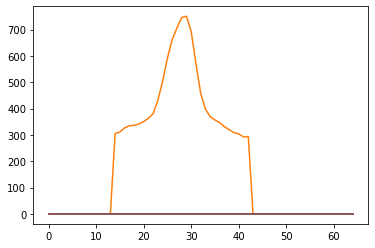

In [16]:
# Use matplotlib to plot all the fluorescent signals:
plt.plot(df_aligned.values)

In [ ]:
# Now instead of all signals, plot the average signal:
# use numpy to find the mean first:
mean_signal = np.zeros(df_aligned.shape[0])
for index, row in df_aligned.iterrows():
    val = row[row != 0] 
    mean_signal[index] = np.mean(val)

#plot
plt.plot()

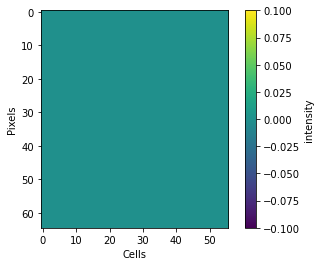

In [23]:
# Finally visualize your aligned, and normalized fluorescent data in a heatmap:
plt.imshow(df_normalized.values)
plt.xlabel('Cells')
plt.ylabel('Pixels')
cbar = plt.colorbar()
cbar.set_label('intensity')

## Part 2:

Repeat the analysis, but instead of realigning the fluorescent signals to it's maximum peaks. Modify the `realign_data` function so that it requires a second input named `aligned`. In the function, if `align == "max"`, the code executes the max peak alignment like before.

But if `align == "center"`, the function will find the mid point of `input_data[column ! = 0]`, the middle index of non-zero values. Then shifts the values according to the new criteria.

After adding this feature to `functions.utils.realign_data`, write the appropriate test for this new feature in `tests.test_utils.py`, make sure this test is passing. Then implement the new alignment and revisualize the results, again making sure all axis and colorbars are properly labeled:

In [28]:
# apply your new realignment here
for column in in_data:
        if align == "center":
            # Write the alignment code here, replacing peak with the center that you found (mid_longest). 
            mid = find_middle(in_data[column].values)
            mdiff = mid_longest - mid
            d[column] = in_data[column].shift(periods=mdiff, fill_value=0)
            assert find_middle(d[column]) == mid_longest
            shifts[column] = mdiff
        return d, shifts

SyntaxError: 'return' outside function (<ipython-input-28-b8cdc47cd147>, line 10)

In [ ]:
# visualize all of the newly aligned data


In [29]:
# visualize the mean of the newly aligned data
from sklearn.preprocessing import minmax_scale

# Normalize every column entry of your realigned dataframe:

# pre-allocate an empty dataframe of 0's to be filled with normalized values, the index and column of this dataframe will be the same as the df_aligned dataframe:
df_normalized = pd.DataFrame(0, index=df_aligned.index, columns=df_aligned.columns)

# fill in the `df_normalized` dataframe with normalized columns:
for column, vals in df_aligned.iteritems():
    # find the indices of the column that are not 0, only normalize those:
    ind = df_aligned.index[df_aligned[column]!=0].tolist()
    # Normalize of those:
    df_normalized.loc[ind, column] = minmax_scale(df_aligned.loc[ind, column].values)

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

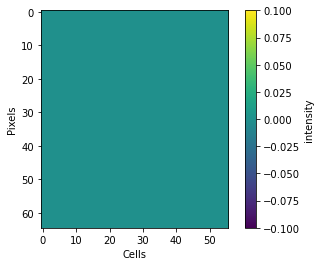

In [30]:
# visualize the heatmap

plt.imshow(df_normalized.values)
plt.xlabel('Cells')
plt.ylabel('Pixels')
cbar = plt.colorbar()
cbar.set_label('intensity')

Lastly, push your submission branch, the `pytests` should automatically be executed upon your push. Make sure these tests are passing! Again, add me as a collaborator, and a reviewer in your pull request that merges `submission` into `main`. 